## Welcome to my second project! 🙋‍♂️🎮
In this project, we will be analyzing a dataset of video game sales. This dataset, extracted from Kaggle, contains a wealth of information about video game sales across different platforms, genres, and regions. We will explore various aspects of this data, such as the most popular genres, the best-selling games, and trends in video game sales over the years.

## 1. Motivation & Inspiration
As a personal hobby, I've always enjoyed immersing myself in the world of video games during my free time. The captivating stories, engaging gameplay, and innovative mechanics found in these games have always fascinated me. On a professional level, my interest in data analysis has led me to explore the vast and dynamic industry of video gaming from a different perspective. By analyzing video game sales data, I aim to gain insights into the trends and patterns that drive this industry. This project not only allows me to combine my personal interest and professional skills, but also adds diversity to my data analysis portfolio.

## 2. Load libraries & data

In [3]:
import numpy as np
import pandas as pd
import scipy.stats as st
pd.set_option('display.max_columns', None)

import math

import matplotlib.pyplot as plt
%matplotlib inline

import seaborn as sns
sns.set_style('whitegrid')

from sklearn.preprocessing import StandardScaler
from scipy import stats

data = pd.read_csv('vgsales.csv')

## 3. Inspecting the data

In [4]:
# Display the first few rows of the dataset
data.head()

,Rank,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
0,1,Wii Sports,Wii,2006.0,Sports,Nintendo,41.49,29.02,3.77,8.46,82.74
1,2,Super Mario Bros.,NES,1985.0,Platform,Nintendo,29.08,3.58,6.81,0.77,40.24
2,3,Mario Kart Wii,Wii,2008.0,Racing,Nintendo,15.85,12.88,3.79,3.31,35.82
3,4,Wii Sports Resort,Wii,2009.0,Sports,Nintendo,15.75,11.01,3.28,2.96,33.00
4,5,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,Nintendo,11.27,8.89,10.22,1.00,31.37


In [5]:
# Deleting some incomplete data 
drop_row_index = data[data['Year'] > 2015].index
data = data.drop(drop_row_index)

In [6]:
# Check the shape of this dataset 
data.shape

(16250, 11)

In [7]:
# Investigate more info 
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 16250 entries, 0 to 16597
Data columns (total 11 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Rank          16250 non-null  int64  
 1   Name          16250 non-null  object 
 2   Platform      16250 non-null  object 
 3   Year          15979 non-null  float64
 4   Genre         16250 non-null  object 
 5   Publisher     16194 non-null  object 
 6   NA_Sales      16250 non-null  float64
 7   EU_Sales      16250 non-null  float64
 8   JP_Sales      16250 non-null  float64
 9   Other_Sales   16250 non-null  float64
 10  Global_Sales  16250 non-null  float64
dtypes: float64(6), int64(1), object(4)
memory usage: 1.5+ MB


Rank - Ranking of overall sales, integer

Name - The games name

Platform - Platform of the games release (i.e. PC,PS4, etc.), object

Year - Year of the game's release, float

Genre - Genre of the game ,object

Publisher - Publisher of the game, object

NA_Sales - Sales in North America (in millions), float

EU_Sales - Sales in Europe (in millions), float

JP_Sales - Sales in Japan (in millions), float

Other_Sales - Sales in the rest of the world (in millions), float

Global_Sales - Total worldwide sales, float

### 3.2 Handling Missing Data

In [8]:
# Looking for null values 
data.isnull().sum()

Rank              0
Name              0
Platform          0
Year            271
Genre             0
Publisher        56
NA_Sales          0
EU_Sales          0
JP_Sales          0
Other_Sales       0
Global_Sales      0
dtype: int64

In [9]:
import numpy as np

# Replace 'Null values' with np.nan
data = data.replace('No data available', np.nan)

# Replace missing 'Publisher' values with 'Unknown'
data['Publisher'].fillna('Unknown', inplace=True)

## 5. Exploratory data analysis (EDA)
In this section, we will go into a more detailed analysis of the data and seek to draw conclusions that will provide us with valuable information about this dataset. 

## 6. Genre analysis

In [10]:
genre_counts = data['Genre'].value_counts()

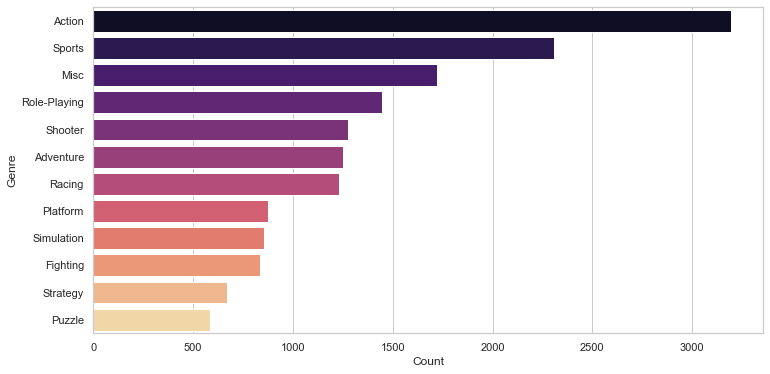

In [11]:
import seaborn as sns
import matplotlib.pyplot as plt

# Set a whitegrid style and a neutral color palette
sns.set(style="whitegrid", palette="pastel")

# Create a bar plot of genres and their frequencies
plt.figure(figsize=(12, 6))  # Adjust the plot size
sns.barplot(x=genre_counts.values, y=genre_counts.index, palette="magma")

# Configure labels and title
plt.xlabel("Count")
plt.ylabel("Genre")

# Show the plot
plt.show()

We can see that the population is leaning mostly towards action and/or sports games. 

- Action: 3316 games released.
- Sports: 2346 games released. 

## 7. Videogames releases between 1980 and 2015 

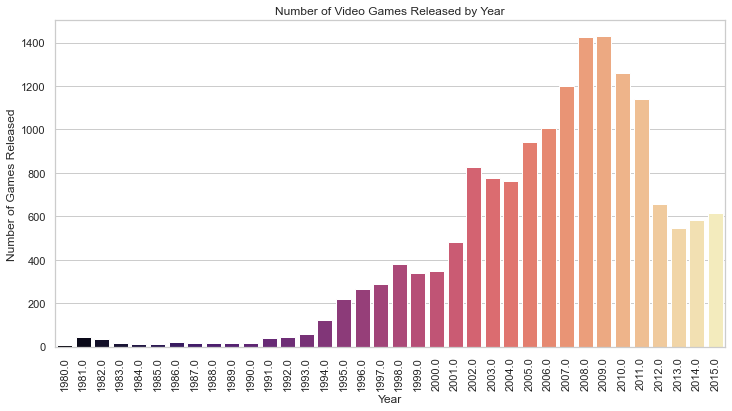

In [12]:
import seaborn as sns
import matplotlib.pyplot as plt

# Group the data by year and count how many games were released in each year
games_per_year = data['Year'].value_counts().sort_index()

# Filter out years that are not null
games_per_year = games_per_year[games_per_year.index.notnull()]

# Create a bar chart
plt.figure(figsize=(12, 6))
sns.barplot(x=games_per_year.index, y=games_per_year.values, palette="magma")

# Configure labels and title
plt.xlabel("Year")
plt.ylabel("Number of Games Released")
plt.title("Number of Video Games Released by Year")

# Rotate x-axis labels for better readability
plt.xticks(rotation=90)

# Show the plot
plt.show()

With this visualization, we can see how between the years 2007-2010 there is a kind of "boom" within the video game industry and people for acquiring them.

- 2009.0 -> 1431
- 2008.0 -> 1428
- 2010.0 -> 1259
- 2007.0 -> 1202
- 2011.0 -> 1139

## 8. Top 5 years games released by genre.

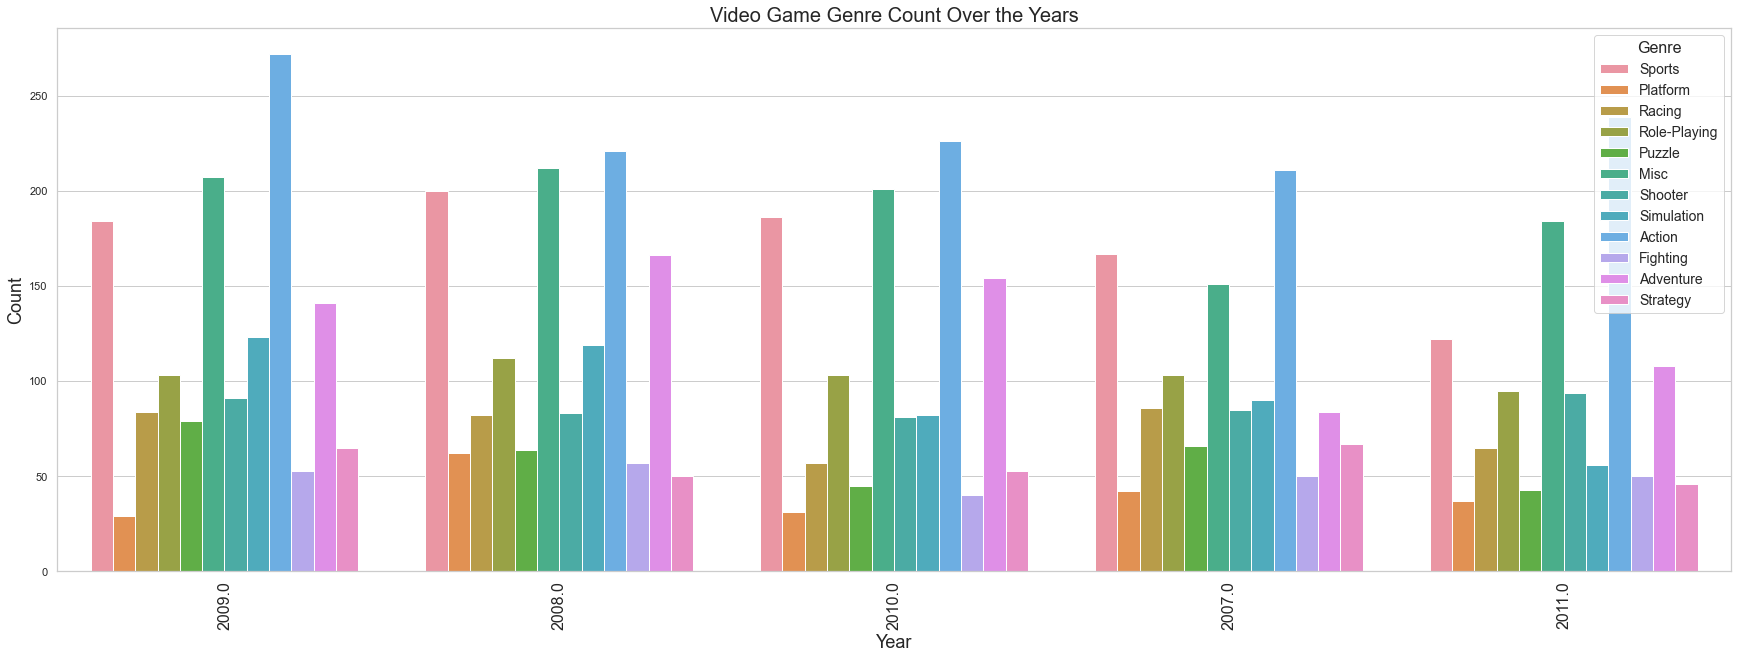

In [13]:
# Define a custom color palette
custom_palette = sns.color_palette("Set2")

# Create the figure and set the custom palette
plt.figure(figsize=(30, 10))
sns.set_palette(custom_palette)

# Create the countplot
sns.countplot(x="Year", data=data, hue='Genre', order=data.Year.value_counts().iloc[:5].index)

# Customize the x-axis ticks
plt.xticks(size=16, rotation=90)

# Add labels, titles, and legends if needed
plt.xlabel("Year", size=18)
plt.ylabel("Count", size=18)
plt.title("Video Game Genre Count Over the Years", size=20)
plt.legend(title="Genre", fontsize=14, title_fontsize=16)

# Show the plot
plt.show()

## 9. Global sales over the years

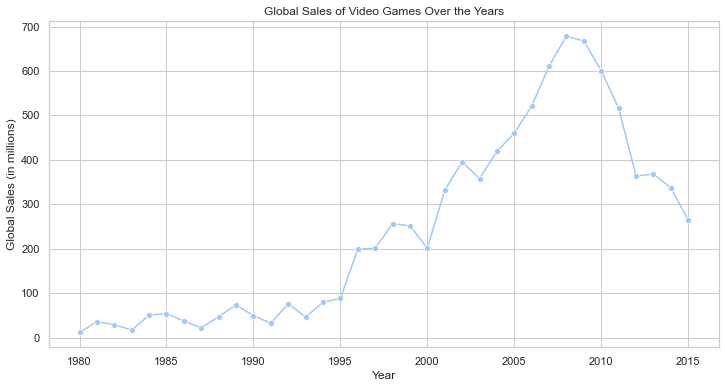

In [14]:
import seaborn as sns
import matplotlib.pyplot as plt

# Group the data by year and sum global sales for each year
yearly_sales = data.groupby('Year')['Global_Sales'].sum()

# Filter out non-null years
yearly_sales = yearly_sales[yearly_sales.index.notnull()]

# Create a line plot
plt.figure(figsize=(12, 6))
sns.lineplot(x=yearly_sales.index, y=yearly_sales.values, marker='o', linestyle='-', color='b')

# Configure labels and title
plt.xlabel("Year")
plt.ylabel("Global Sales (in millions)")
plt.title("Global Sales of Video Games Over the Years")

# Show the plot
plt.show()


In this case, if the trend of 2008-2009 as the best years for global sales is repeated.

## 10. Top 10 best-selling videogames

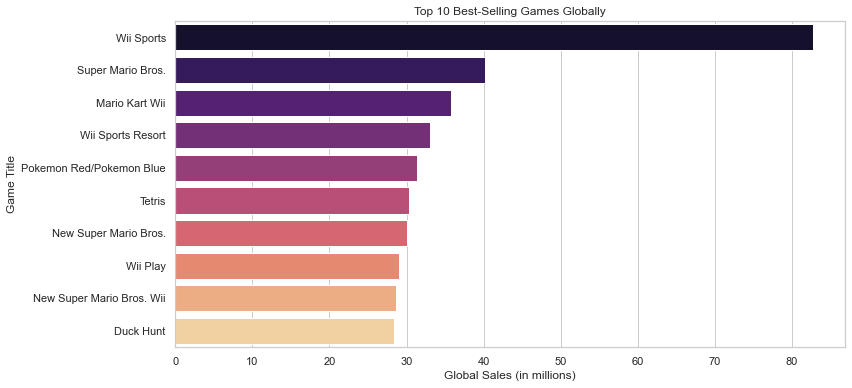

In [15]:
# Global Top 10 Games
top_global_games = data[['Name', 'Global_Sales']].nlargest(10, 'Global_Sales')

# Plot the global top 10 games
plt.figure(figsize=(12, 6))
sns.barplot(x='Global_Sales', y='Name', data=top_global_games, palette='magma')
plt.title('Top 10 Best-Selling Games Globally')
plt.xlabel('Global Sales (in millions)')
plt.ylabel('Game Title')
plt.show()

The clear winner is wii sports, but it is also interesting to see how nintendo video games are the most predominant among the best sellers of the dataset.

This trend can be seen due to the popularity over the years of the Wii console and also shows that these games never go out of fashion.

## 11. Which genre game has been released the most in a single year?

In [16]:
# Group the data by 'Year' and 'Genre', and calculate the count of each combination
year_max_df = data.groupby(['Year', 'Genre']).size().reset_index(name='count')

# Identify the rows where the 'count' is equal to the maximum count for each 'Year'
year_max_idx = year_max_df.groupby(['Year'])['count'].transform(max) == year_max_df['count']

# Create a DataFrame containing the most popular genre for each year
year_max_genre = year_max_df[year_max_idx].reset_index(drop=True)

# Remove duplicate entries based on both 'Year' and 'count', keeping the last occurrence
year_max_genre = year_max_genre.drop_duplicates(subset=["Year", "count"], keep='last').reset_index(drop=True)

In [17]:
genre = year_max_genre['Genre'].values

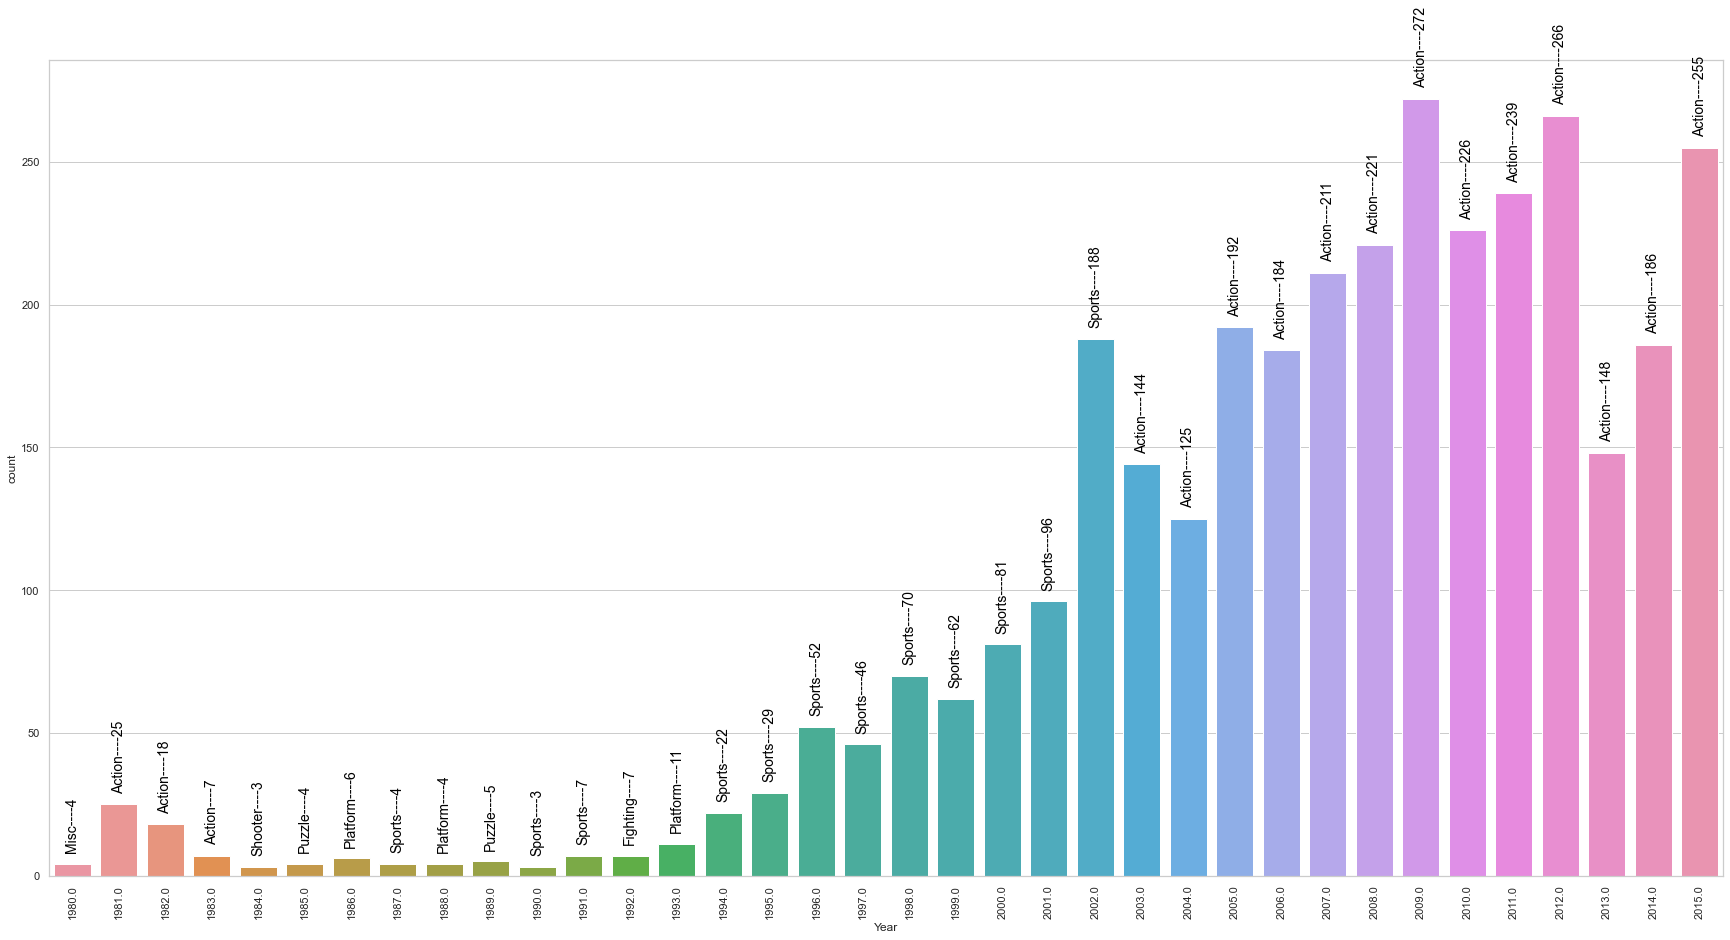

In [18]:
# Define a custom color palette
custom_palette = sns.color_palette("Set2")

# Create a figure with a specific size
plt.figure(figsize=(30, 15))
sns.set_palette(custom_palette)

# Create the barplot using Seaborn
g = sns.barplot(x='Year', y='count', data=year_max_genre)

# Initialize an index variable for iterating through values
index = 0

# Add genre labels on top of the bars
for value in year_max_genre['count'].values:
    # Extract the genre and count for the current index
    genre_count = str(genre[index] + '----' + str(value))
    
    # Add a text label above the bar, with customization
    g.text(index, value + 5, genre_count, color='#000', size=14, rotation=90, ha="center")
    
    # Increment the index for the next iteration
    index += 1

# Customize the x-axis ticks by rotating them
plt.xticks(rotation=90)

# Display the plot
plt.show()

We can clearly see how the three peaks within this graph are taken by the action genre, which is not surprising since it follows the clear trend of the first analysis/graph of this study.

- 2009 Action: 272 releases
- 2012 Action: 212 releases
- 2015 Action: 255 releases

## 12. Platform perfomance 

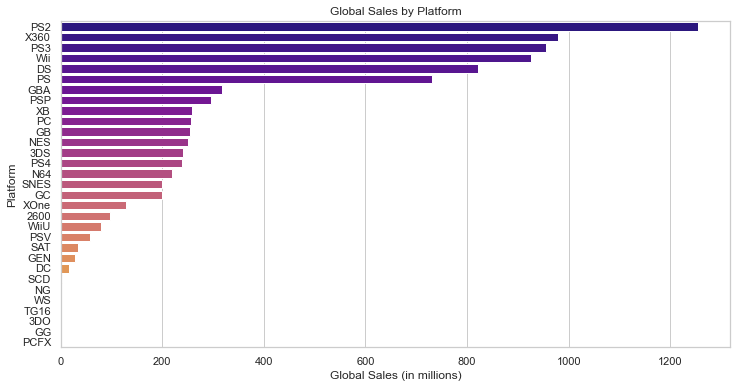

In [19]:
# Global Platform Sales
global_platform_sales = data.groupby('Platform')['Global_Sales'].sum().sort_values(ascending=False)

# Plot a bar chart for global platform sales
plt.figure(figsize=(12, 6))
sns.barplot(x=global_platform_sales.values, y=global_platform_sales.index, palette='plasma')
plt.title('Global Sales by Platform')
plt.xlabel('Global Sales (in millions)')
plt.ylabel('Platform')
plt.show()

Despite the dominance of video games developed by Nintendo, which only work on their consoles, we see how PS2 and Xbox 360 are placed as the most demanded consoles in the market during the period of time provided in the dataset.

Here we can see a clear fall of Nintendo in the world of consoles, and in turn a drop in the furor that was at the time by the Wii.

## 13. Publisher insights 

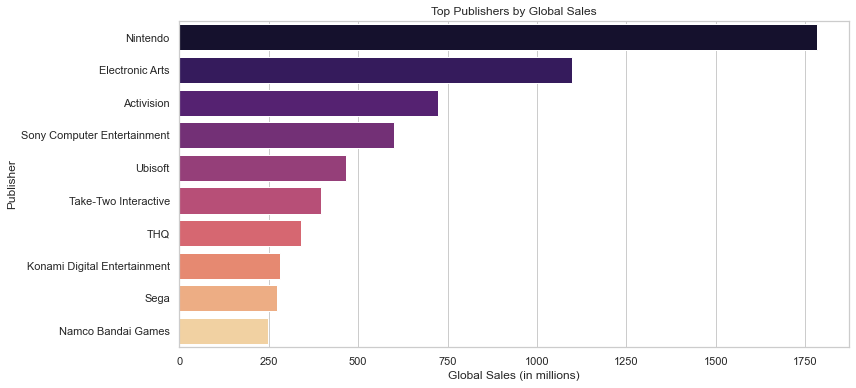

In [20]:
# Global Publisher Sales
global_publisher_sales = data.groupby('Publisher')['Global_Sales'].sum().nlargest(10)

# Plot a bar chart for top publishers
plt.figure(figsize=(12, 6))
sns.barplot(x=global_publisher_sales.values, y=global_publisher_sales.index, palette='magma')
plt.title('Top Publishers by Global Sales')
plt.xlabel('Global Sales (in millions)')
plt.ylabel('Publisher')
plt.show()

Here we can clearly see how Nintendo is the dominator with a clear difference, exceeding 1750 million in worldwide sales. 